## Your Name: Sunint Bindra


## Your Collaborator's Name (if any): 

# Assignment 3. Regression

In this homework, you will use regression to investigate in what condition would people rent bike rental more. 

### Data

For this homework, you will use the following dataset:
- Bike Sharing Dataset: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


### References

- Chapter 11, 14, and 15 in Data Science from Scratch.
- https://onlinecourses.science.psu.edu/stat501/
- Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.
- [L1 and L2 Regularization Methods](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c)

## Problem 1 What factors influence daily bike rental count

The attached dataset ([bike_sharing_day.csv](https://drive.google.com/file/d/1UV9t92gFG9GhjGwWoQUdEJgxWMOc8GnR/view?usp=sharing)) contains the daily bike rental count and corresponding environmental and seasonal conditions, for example, weather conditions, precipitation, day of week, season, hour of the day. In this problem, you will use linear regression to find how these conditions affect bike rental count.

The columns definition is as follows ([Readme.txt](https://drive.google.com/file/d/14ripL9wx4QtWk057SUVDm5b_uUW7HNyB/view?usp=sharing)):

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Q1 Fit a linear regression model to show how windspeed, temp, atemp, hum, season, and weathersit affect  bike rental count [cnt] (20 pts) 

You should notice that windspeed, temp, atemp, and hum are continues variables whereas season, holiday, workingday, and weathersit are categorical variables. Your model should consider how to handle categorical variables. Use APIs from statsmodels to build your linear regression model. You can either use statsmodels.api.OLS or statsmodels.formula.api.ols. 

Print out the regression table and explain your results. Your explanation should include:
#### - Goodness of Fit
#### - Interpreting Coefficients of Continuous Predictor Variables
#### - Interpreting Coefficients of Categorical Predictor Variables

In [ ]:
import pandas as pd

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
drive.CreateFile({'id': '1UV9t92gFG9GhjGwWoQUdEJgxWMOc8GnR'}).GetContentFile('bike_sharing_day.csv')

In [ ]:
bike_sharing_data = pd.read_csv('bike_sharing_day.csv')

In [ ]:
bike_sharing_data.sample(frac=1).head(n=5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
143,144,2011-05-24,2,0,5,0,2,1,2,0.660000,0.604813,0.740833,0.207092,659,3833,4492
262,263,2011-09-20,3,0,9,0,2,1,2,0.561667,0.532217,0.881250,0.134954,438,3203,3641
87,88,2011-03-29,2,0,3,0,2,1,1,0.302500,0.292908,0.314167,0.226996,317,2108,2425
18,19,2011-01-19,1,0,1,0,3,1,2,0.292174,0.298422,0.741739,0.208317,78,1572,1650
207,208,2011-07-27,3,0,7,0,3,1,1,0.775000,0.690667,0.402917,0.183463,755,3901,4656


In [ ]:
# Imports and variables
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
df = bike_sharing_data
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generating regression
regression = ols(formula='cnt ~ windspeed + temp + atemp + hum + C(season) + C(holiday) + C(workingday) + C(weathersit)', data=df)

# Fitting model
model = regression.fit()

# Display summary of results
display(model.summary2())

variables = model.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
print(vif)



<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.554     
Dependent Variable:    cnt                 AIC:                   12562.8499
Date:                  2020-06-04 20:40    BIC:                   12617.9829
No. Observations:      731                 Log-Likelihood:        -6269.4   
Df Model:              11                  F-statistic:           83.27     
Df Residuals:          719                 Prob (F-statistic):    2.56e-120 
R-squared:             0.560               Scale:                 1.6756e+06
----------------------------------------------------------------------------
                     Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
----------------------------------------------------------------------------
Intercept           3061.1085  360.2411  8.4974 0.0000  2353.8584  3768.3587
C(season)[T.2]       917.6644  178.5269  5.1402 0.0000   567.1681  1268.1608
C(season)[T.3]       469.1203  236.4066  1.9844 0.0476     4.9906   933.2501
C(season)[T.4]      1493.7920  152.4691  9.7973 0.0000  1194.4540  1793.1299
C(holiday)[T.1]     -596.8185  296.9185 -2.0100 0.0448 -1179.7493   -13.8877
C(workingday)[T.1]   101.1146  106.9350  0.9456 0.3447  -108.8276   311.0568
C(weathersit)[T.2]  -233.9494  127.6902 -1.8322 0.0673  -484.6396    16.7408
C(weathersit)[T.3] -1941.7010  327.0346 -5.9373 0.0000 -2583.7577 -1299.6442
windspeed          -3280.3364  684.4460 -4.7927 0.0000 -4624.0879 -1936.5849
temp                5818.3184 2196.0856  2.6494 0.0082  1506.8120 10129.8248
atemp                406.0477 2399.3259  0.1692 0.8657 -4304.4741  5116.5694
hum                -2610.9173  461.4506 -5.6581 0.0000 -3516.8688 -1704.9657
----------------------------------------------------------------------------
Omnibus:                 20.043           Durbin-Watson:              0.439 
Prob(Omnibus):           0.000            Jarque-Bera (JB):           11.580
Skew:                    0.132            Prob(JB):                   0.003 
Kurtosis:                2.442            Condition No.:              112   
============================================================================

"""

[56.61511909028398, 2.6189290184210763, 4.657876688030729, 1.8681861970856037, 1.0731568814440722, 1.0782837640739587, 1.5913605338419614, 1.301895338140891, 1.2257707233846418, 70.40346976507293, 66.60366763634129, 1.8819113378779688]


The R^2 measure (goodness of fit test) is 0.560 for this model. This tells us 
As the R^2 is between 0.5 and 0.7 this is considered a moderate effect size. While the test is okay, a more robust test would require a higher R^2 score. The majority of outcome variance is explained by the OLS linear regression model, however some of the variance still remains unexplained. 

A positive coefficient on a categorical variable tells us that the cnt correlates with that specific category in the same direction if it is positive and in the opposite direction if it is negative. For example, we can see for the workingday categorical variable that bike rentals correlate when the day is a working day (neither holiday or weekend). This makes logical sense - bike rentals would go up when people are travelling to and from work, many on bikes. Conversly, for the holiday categorical variables bike rentals correlate negatively, meaning if it is a holiday the number of bike rentals goes down. This also makes logical sense - people are less likely to rent bikes on a holiday as they will be spending time with their families and not travelling. This logic can be applied to all the categorical variables. 

For the continuous variables, the same understanding applies that the cnt correlates in the same direction if it is positive coefficient and in the opposite direction if it is negative. For example, for atemp (the temp it feels like in Celsius) we see the coefficient is ~406. This means for every degree Celsius atemp increases, bike rentals go up by an average of ~406.  This logic can be applied to all the continuous variables. 

### Q2 Multicollinearity  (25 pts)

Multicollinearity  is a phenomenon in which two or more of the predictors in a regression model are moderately or highly correlated.

Compute and show VIF (Variance Inflation Factor) for each of the predictors in your model from Q1. You can use statsmodels.stats.outliers_influence.variance_inflation_factor to compute VIF. 

What predictors are correlated and can be removed? If there are any predictors that are redundant, remove them and fit the model again, print out the regression table and explain the differences in your result against Q1. 

Hint: if you suspect two predictors are redundant, experiement with removing either of the predictors.

In [ ]:
# Imports
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = bike_sharing_data

# Generating and fitting the previous regression from Q1
regression = ols(formula='cnt ~ windspeed + temp + atemp + hum + C(season) + C(holiday) + C(workingday) + C(weathersit)', data=df).fit()

# Generating VIF values and printing in order is displayed in Q1 summary table
variables = regression.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print("VIF Values in order of predictors from summary table")
print(vif)
print('\n')
# Displaying linear regression summary 
display(regression.summary2())
print('\n')

# X = [df.windspeed]
# X[df.windspeed] = 1
# vidModel = [variance_inflation_factor(df.windspeed, i) for i in range (df.windspeed[1])]
# # VIFmodel = variance_inflation_factor(df.values, i) for i in range(df.windspeed[1])




# General acceptance for high multicollinearity is VIF > 10
# Thus, we will fit the model again removing predictors with high VIF

# Generating and fitting regression removing temp and atemp - which have VIFs of ~70 and  ~66.7, respectively 
VIFComputation = ols(formula='cnt ~ windspeed + hum + C(season) + C(holiday) + C(workingday) + C(weathersit)', data=df).fit()

# Computing and displaying VIF values and printing in order is displayed in Q1 summary table (with temp and atemp removed)
variables = VIFComputation.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
# Printing VIF's 
print("VIF Values in order of predictors from summary table with temp and atemp excluded")
print(vif)
print('\n')

# Displaying linear regression summary 
display(VIFComputation.summary2())
print('\n')
# display(vif.summary1())
import statsmodels.graphics.api as smg

VIF Values in order of predictors from summary table
[56.61511909028398, 2.6189290184210763, 4.657876688030729, 1.8681861970856037, 1.0731568814440722, 1.0782837640739587, 1.5913605338419614, 1.301895338140891, 1.2257707233846418, 70.40346976507293, 66.60366763634129, 1.8819113378779688]




<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.554     
Dependent Variable:    cnt                 AIC:                   12562.8499
Date:                  2020-06-04 20:42    BIC:                   12617.9829
No. Observations:      731                 Log-Likelihood:        -6269.4   
Df Model:              11                  F-statistic:           83.27     
Df Residuals:          719                 Prob (F-statistic):    2.56e-120 
R-squared:             0.560               Scale:                 1.6756e+06
----------------------------------------------------------------------------
                     Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
----------------------------------------------------------------------------
Intercept           3061.1085  360.2411  8.4974 0.0000  2353.8584  3768.3587
C(season)[T.2]       917.6644  178.5269  5.1402 0.0000   567.1681  1268.1608
C(season)[T.3]       469.1203  236.4066  1.9844 0.0476     4.9906   933.2501
C(season)[T.4]      1493.7920  152.4691  9.7973 0.0000  1194.4540  1793.1299
C(holiday)[T.1]     -596.8185  296.9185 -2.0100 0.0448 -1179.7493   -13.8877
C(workingday)[T.1]   101.1146  106.9350  0.9456 0.3447  -108.8276   311.0568
C(weathersit)[T.2]  -233.9494  127.6902 -1.8322 0.0673  -484.6396    16.7408
C(weathersit)[T.3] -1941.7010  327.0346 -5.9373 0.0000 -2583.7577 -1299.6442
windspeed          -3280.3364  684.4460 -4.7927 0.0000 -4624.0879 -1936.5849
temp                5818.3184 2196.0856  2.6494 0.0082  1506.8120 10129.8248
atemp                406.0477 2399.3259  0.1692 0.8657 -4304.4741  5116.5694
hum                -2610.9173  461.4506 -5.6581 0.0000 -3516.8688 -1704.9657
----------------------------------------------------------------------------
Omnibus:                 20.043           Durbin-Watson:              0.439 
Prob(Omnibus):           0.000            Jarque-Bera (JB):           11.580
Skew:                    0.132            Prob(JB):                   0.003 
Kurtosis:                2.442            Condition No.:              112   
============================================================================

"""



VIF Values in order of predictors from summary table with temp and atemp excluded
[49.26069484584752, 1.54289088739219, 1.6343211665796467, 1.627814410928868, 1.0709291854465617, 1.0731258246074942, 1.544881136845387, 1.2720526475007918, 1.1868829176186997, 1.8061321359292821]




<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.452     
Dependent Variable:     cnt                AIC:                  12710.2602
Date:                   2020-06-04 20:42   BIC:                  12756.2043
No. Observations:       731                Log-Likelihood:       -6345.1   
Df Model:               9                  F-statistic:          67.98     
Df Residuals:           721                Prob (F-statistic):   3.35e-90  
R-squared:              0.459              Scale:                2.0555e+06
---------------------------------------------------------------------------
                     Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
---------------------------------------------------------------------------
Intercept           4320.6642 372.1785 11.6091 0.0000  3589.9812  5051.3473
C(season)[T.2]      2389.1847 151.7691 15.7422 0.0000  2091.2225  2687.1470
C(season)[T.3]      2899.4416 155.0987 18.6942 0.0000  2594.9425  3203.9407
C(season)[T.4]      2188.6131 157.6334 13.8842 0.0000  1879.1378  2498.0885
C(holiday)[T.1]     -512.8743 328.5186 -1.5612 0.1189 -1157.8416   132.0931
C(workingday)[T.1]   194.2487 118.1552  1.6440 0.1006   -37.7206   426.2180
C(weathersit)[T.2]  -506.3613 139.3461 -3.6338 0.0003  -779.9339  -232.7887
C(weathersit)[T.3] -2525.2551 358.0405 -7.0530 0.0000 -3228.1815 -1822.3286
windspeed          -3362.9968 745.9547 -4.5083 0.0000 -4827.4997 -1898.4940
hum                -1481.4579 500.6963 -2.9588 0.0032 -2464.4547  -498.4612
---------------------------------------------------------------------------
Omnibus:                  12.108          Durbin-Watson:             0.414 
Prob(Omnibus):            0.002           Jarque-Bera (JB):          10.854
Skew:                     0.241           Prob(JB):                  0.004 
Kurtosis:                 2.649           Condition No.:             24    
===========================================================================

"""

The R^2 value decreased by a slight margin; this can be expected when removing colinear predictors. The coefficients for C(season)[T.2], C(season)[T.3], C(season)[T.4], and C(workingday)[T.1] increased, meaning the magnitude of their positive correlation increased. 

increase: season 2, 3, 4, workingday1
decreases: 
For some of the negative correlations the coefficients decreases in magnitude towards 0. These are C(holiday)[T.1], C(weathersit)[T.2], C(weathersit)[T.3], and humidity. 
It is interesting to note the negative correlation of windspeed increases in magnitude, but only marginally. 

The VIF values for retained predictors decreases when high VIF predictors were excluded. Evidently, the colinearity of the retained predictors has decreased. 

## Problem 2 Prediction

Now we turn to prediction. To solve this problem, you need to train a linear regression and can predict bike rental count, and properly evaluate your model. You can use models provided in scikit-learn.

### Q1 Train Your Prediction Model (20 pts)

Train a linear regression model to predict rental count (cnt) using season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, and windspeed. Use 10-fold cross-validation to validate your prediction model. 

Report MSE, MAE, confidence interval of MAE, and R-squared.

     season  holiday  workingday  weathersit       hum  windspeed
0         1        0           0           2  0.805833   0.160446
1         1        0           0           2  0.696087   0.248539
2         1        0           1           1  0.437273   0.248309
3         1        0           1           1  0.590435   0.160296
4         1        0           1           1  0.436957   0.186900
..      ...      ...         ...         ...       ...        ...
726       1        0           1           2  0.652917   0.350133
727       1        0           1           2  0.590000   0.155471
728       1        0           0           2  0.752917   0.124383
729       1        0           0           1  0.483333   0.350754
730       1        0           1           2  0.577500   0.154846

[731 rows x 6 columns]
5233.701047088168
6


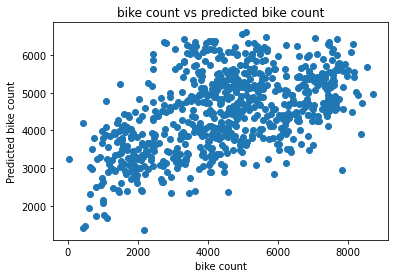



mseVal
445918.44270196126


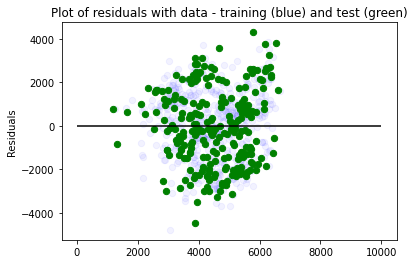

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from sklearn import datasets, linear_model
df = bike_sharing_data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X = df.drop(['cnt', 'instant', 'dteday', 'yr', 'mnth', 'weekday', 'temp', 'atemp', 'casual', 'registered'], axis =1)
print(X)
lm = LinearRegression()
lm.fit(X, df.cnt)
LinearRegression(copy_X = True, fit_intercept = True, normalize = False)
print(lm.intercept_)
print(len(lm.coef_))
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'coefficientsEstimate'])
lm.predict(X)[0:5]
plt.scatter(df.cnt, lm.predict(X))
plt.xlabel("bike count")
plt.ylabel("Predicted bike count")
plt.title("bike count vs predicted bike count")
plt.show()
mse = np.mean(((df.cnt - lm.predict(X))**2)/6)
print('\n')
print("mseVal")
print(mse)

X_train, X_test, Y_train, Y_test = train_test_split(X, df.cnt, test_size = 0.33, random_state = 5) 
lmPred = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c = 'b', s = 40, alpha = 0.05)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c = 'g', s = 40)
plt.hlines(y=0, xmin = 0, xmax = 10000)
plt.title("Plot of residuals with data - training (blue) and test (green)")
plt.ylabel("Residuals")
plt.show()